# 웹파이선 TERM-PROJECT Report
2019102658 디지털콘텐츠학과 황성원



### <햄스터 프로젝트> - Hamster Project
#### 시간이 멈추는 슈팅게임

#### 1. 주제선정 이유 및 공부할 점
Pygame을 이용한 슈팅 게임을 구현함으로써, <br>
파이썬에서 어떠한 방식으로 Pygame 라이브러리가 사용되고, <br>
구동에 사용되는 함수들과 구현 방식을 개발 및 공부한다.<br>

게임의 기본이 되는 2D 슈팅 게임을 구현하며,<br>
장애물, 아이템, 조작, 공격 등의 개발 과정을 경험한다.

#### 2. 게임설명

- 게임 설명: <br>
    지구 최강의 햄스터를 뽑는 햄스터 프로젝트!  <br>
    우승을 한 햄스터는 우주햄스터로서 우주선에 탑승할 수 있는 기회가 주어집니다. <br>
    어려서부터 우주선을 타는 것이 꿈이었던 햄스터는 이 프로젝트에 참가하게 되는데... <br>
    프로젝트에서 이기는 법은 햄스터 구름을 지키는 일!<br>
    로봇 햄스터로부터 당신의 햄스터 구름을 지키세요!<br>
    
 
 
- 조작법:(*필요에 따라 변경가능)<br>
방향키 : 상하좌우 <br>
스페이스: 공격 <br>
<br>
장애물 : 로봇햄스터  <br>
아이템 : 해바라기씨<br>


    
- 게임방법:<br>
     (1) 플레이어는 방향키로 햄스터를 조작합니다.<br>
     (2) 스페이스를 누르면 공격을 할 수 있습니다.<br>
     (3) 햄스터의 조작을 멈추면 게임의 시간이 멈춥니다.<br>
     (4) 로봇햄스터를 제거하고 아이템을 먹으세요.<br>
  

- 세부설명:<br>
     (1) 플레이어는 로봇햄스터를 공격.<br>
     (2) 공격을 당하면 로봇 햄스터 사라짐 (점수 +10)<br>
     (3) 로봇 햄스터에 닿을시 게임 오버!<br>
     (3) 로봇햄스터가 햄스터 구름까지 오면 HEART -1<br>
     (4) 해바라기씨를 먹으면 HEART +1 상승.<br>
     (5) HEART가 0이 되면 게임 오버!
     
     

#### 3. 구현 내용

<메인 화면> <br>
MainMenu, K_RETURN : (엔터 클릭시 게임 시작)<br>

<플레이어 움직임> <br>
방향키 입력 받을시 플레이 화면 내에서 등속으로 캐릭터 움직임 <br>

<공격> <br>
mAttack(스페이스 down시 공격 발사) <br>

<점수 구현> <br>
기본 점수 : 0<br>
기본 HEART : 5<br>
mAttack(로봇 햄스터 공격시 +10점 추가)<br>
itemSeed(해바라기씨 먹을시 heart +1 추가)<br>
nkill(로봇 햄스터가 햄스터 구름 침범시 heart -1 )<br>



<게임 오버 및 클리어 > <br>
장애물에게 닿을 시 게임 오버<br>
Heart==0이 되었을시 게임 오버




#### 4. 진행화면

In [1]:
#!pip install IPython 
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("./메인_스크린샷.png")

In [2]:
from IPython.display import Image
Image("./진행_스크린샷.png")

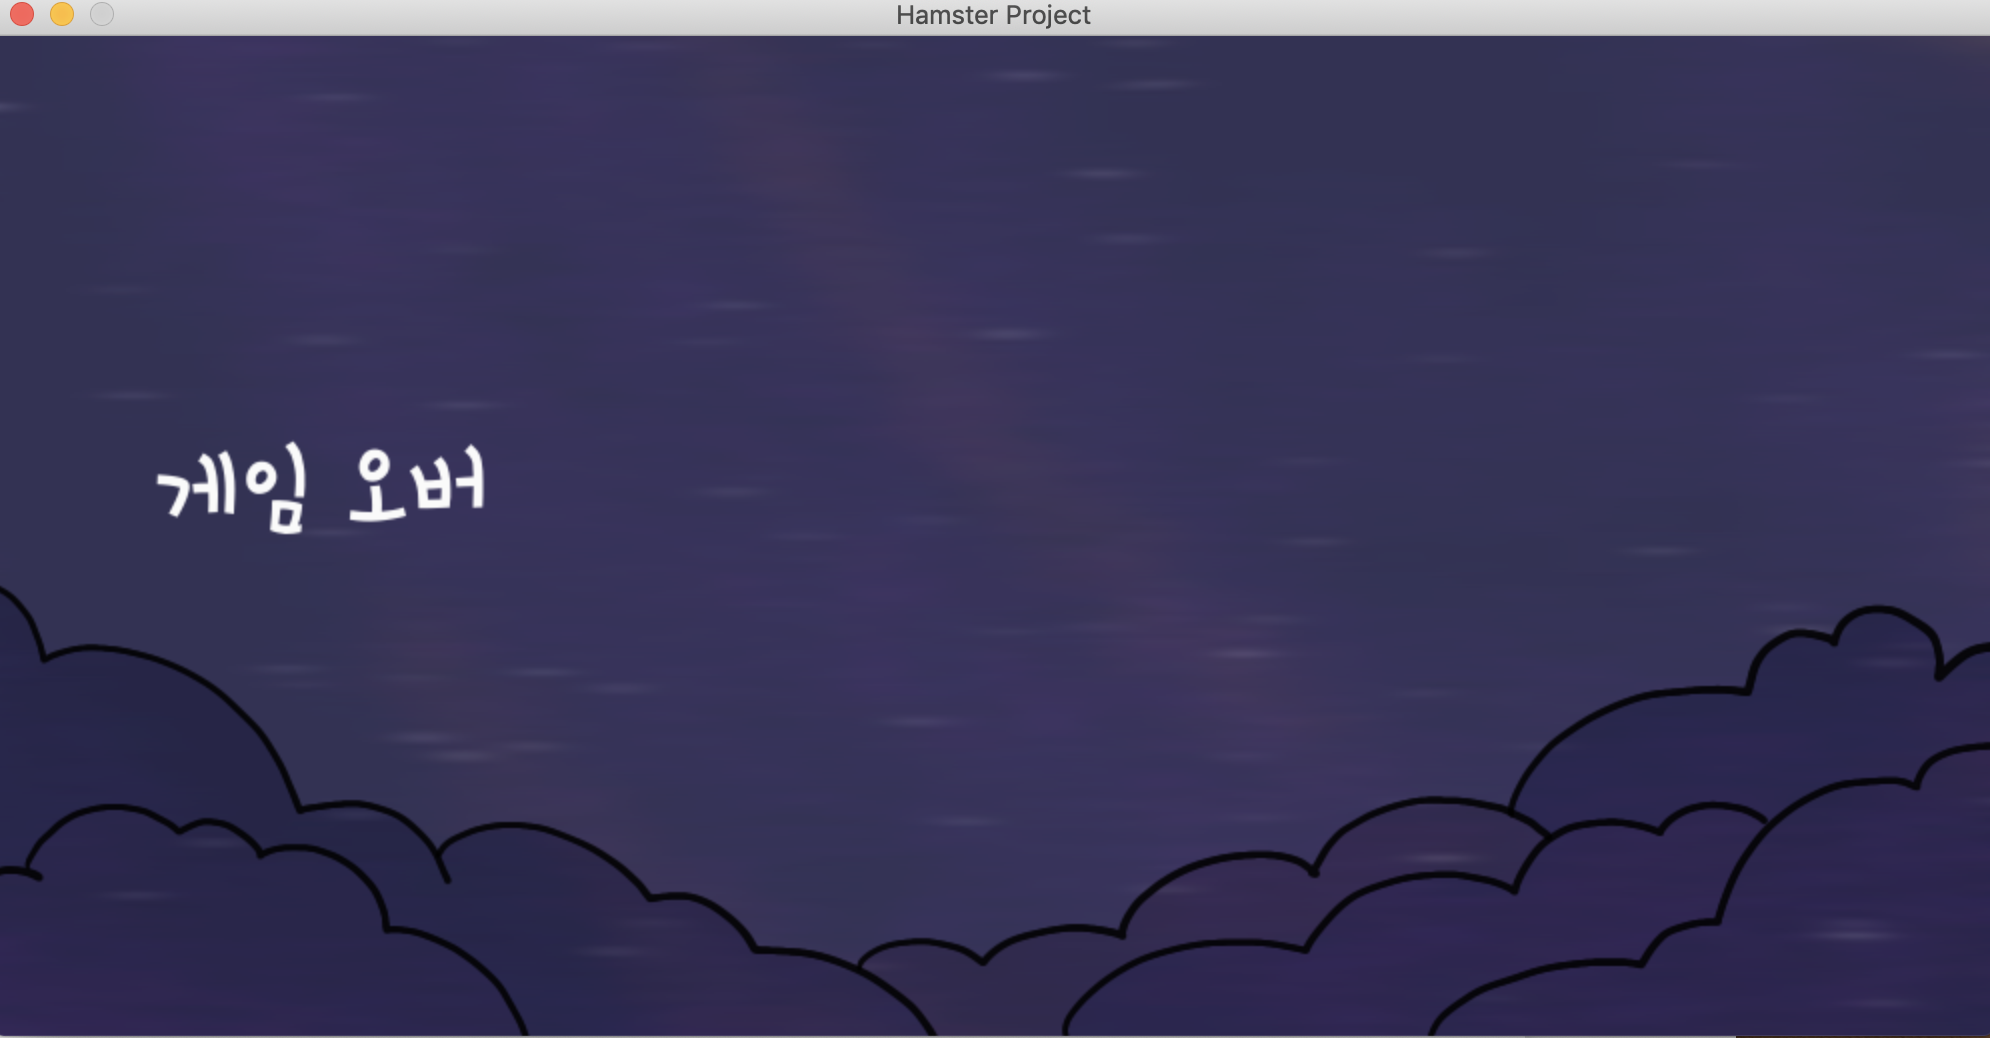

In [3]:
from IPython.display import Image
Image("./게임오버_스크린샷.png")

#### 5. 코드

##### 실행시 주의 사항
1. 스페이스를 눌러도 공격이 나오지 않는다면 게임 화면을 한 번 클릭해주세요!
2. 게임 오버 창이 뜬 후 2초 후 자동 종료됩니다! 참고해주세요

In [4]:
import pygame #파이게임불러오기
import time 
import random 
from datetime import datetime


##1. 시작(사전설정)

pygame.init() #파일 초기화

screen_width = 1000 #게임 스크린 관련 정의
screen_height = 500
screenSize=[1000,500]
screen = pygame.display.set_mode(screenSize)

pygame.display.set_caption("Hamster Project") #이름

clock = pygame.time.Clock() #시간

black=(0,0,0) #색상

textFont = pygame.font.Font(None, 40) #텍스트



##2.클래스 선언

class gameobj: #게임 오브젝트 관련 클래스
    
    def __init__(self): #초기설정
        self.xAsix = 0
        self.yAsix = 0
        self.mSpeed=0
        
    def newObject(self, address): #파일불러오기
        if address[-3:] == "PNG":
            self.img = pygame.image.load(address).convert_alpha()
        else :
            self.img = pygame.image.load(address)
            self.xSize, self.ySize = self.img.get_size()
            
    def importObj(self): #임포트하기
        screen.blit(self.img, (self.xAsix, self.yAsix))
        
    def changeSize(self, xSize, ySize): #오브젝트 크기 재설정
        self.img = pygame.transform.scale(self.img, (xSize, ySize))
        self.xSize, self.ySize = self.img.get_size()
        


def Crack(a,b): #크랙 함수
    if (a.xAsix - b.xSize <= b.xAsix) and (b.xAsix <=a.xAsix+a.xSize):
        if (a.yAsix-b.ySize<= b.yAsix) and (b.yAsix <=a.yAsix+b.ySize):
            return True
        else:
            return False
    else :  
        return False

    
    
##3. 오브젝트 불러오기

#메인배경
mainMenuBG = gameobj()
mainMenuBG.newObject("./background.jpg")
mainMenuBG.xAsix = 0
mainMenuBG.yAsix = 0

backimage = gameobj()
backimage.newObject("./backimage.PNG")
backimage.xAsix = 0
backimage.yAsix = 0

background = gameobj()
background.newObject("./basic_level.PNG")
background.xAsix = 0
background.yAsix = 0

gameover = gameobj()
gameover.newObject("./gameover.PNG")
gameover.xAsix = 0
gameover.yAsix = 0


#메인햄스터    
mHamster = gameobj()
mHamster.newObject("./mainHamster_1.PNG")
mHamster.changeSize(55,80)
mHamster.xAsix = 100
mHamster.yAsix = screen_height/2 - 30
mHamster.mSpeed = 10  


#그외 정의
space_go = False
downSpace = False
downLeft = False
downRight = False
downUp = False
downDown = False
Z = 0
Die = 0
kill = 0
nkill = 0
item = 0
mAttackList=[]
badHamsterList=[]
itemSeedList=[]


##4. 메인메뉴

mainMenu = 0
while mainMenu  == 0:
    clock.tick(60)
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_RETURN: #엔터누르면 넘어가기
                mainMenu = 1
    screen.fill(black)
    mainMenuBG.importObj()
    font = pygame.font.Font("HoonSkyboriR.ttf", 60)
    text = font.render("엔터를 눌러주세요", True, (255,255,255))
    screen.blit(text, (40, round(screenSize[1]/2-50)))    
    pygame.display.flip()
 
    
##5. 메인 게임 이벤트
basicTime = datetime.now()
running = True 
while running: #게임 돌아가는 while문

    clock.tick(60)#프레임
    
    for event in pygame.event.get(): #게임for문
        
        if event.type == pygame.QUIT:#게임탈출 if문
            running = False
            
        if event.type == pygame.KEYDOWN: #키보드 다운 if문
            if event.key == pygame.K_LEFT:
                downLeft = True
            elif event.key == pygame.K_RIGHT:
                downRight = True
            elif event.key == pygame.K_UP:
                downUp = True
            elif event.key == pygame.K_DOWN:
                downDown = True
            elif event.key == pygame.K_SPACE:
                downSpace = True
                k=0
                
        if event.type == pygame.KEYUP: #키보드 업 if문
            if event.key == pygame.K_LEFT:
                downLeft = False
            elif event.key == pygame.K_RIGHT:
                downRight = False
            elif event.key == pygame.K_UP:
                downUp = False
            elif event.key == pygame.K_DOWN:
                downDown = False
            elif event.key == pygame.K_SPACE:
                downSpace = False
        
        
        if downLeft == True: #스피드 조절
            mHamster.xAsix -=mHamster.mSpeed
        elif downRight == True:
            mHamster.xAsix +=mHamster.mSpeed
        elif downUp == True:
            mHamster.yAsix -=mHamster.mSpeed
        elif downDown == True:
            mHamster.yAsix +=mHamster.mSpeed
            
            
        firstTime = datetime.now() #시간표시
        secondTime =  round((firstTime - basicTime).total_seconds())
            
            
            
        if downSpace == True and Z % 3 ==0:#메인공격, 공격발사에 틈 주기(3만큼)
            mAttack = gameobj()
            mAttack.newObject("./MHattack.PNG")
            mAttack.changeSize(30,25)
            mAttack.xAsix = mHamster.xAsix + 30
            mAttack.yAsix = mHamster.yAsix
            mAttack.mSpeed = 20 
            mAttackList.append(mAttack)
        Z +=1
        cutAttackList =[]
        for i in range(len(mAttackList)):
            al = mAttackList[i]
            al.xAsix += al.mSpeed
           #if al.xAsix >= al.xSize:
                #cutAttackList.append(i)
        #cutAttackList.reverse()
        #for j in cutAttackList:
            #del mAttackList[j]
            
        if random.random() > 0.98: #적햄스터
            badHamster = gameobj()
            badHamster.newObject("./enemy_2.PNG")
            badHamster.changeSize(55,80)
            badHamster.yAsix = random.randrange(120, 350)
            badHamster.xAsix = 1000
            badHamster.mSpeed = 30
            badHamsterList.append(badHamster)
        cutBadList=[]
        for i in range(len(badHamsterList)):
            al = badHamsterList[i]
            al.xAsix = al.xAsix-al.mSpeed
            if 0 >=al.xAsix:
                cutBadList.append(i)
        cutBadList.reverse()
        for j in cutBadList:
            del badHamsterList[j]
            nkill +=1
            
            
        if random.random() > 0.98: #아이템
            itemSeed = gameobj()
            itemSeed.newObject("./item_seed.PNG")
            itemSeed.changeSize(30,40)
            itemSeed.yAsix = random.randrange(120, 350)
            itemSeed.xAsix = 1000
            itemSeed.mSpeed = 20
            itemSeedList.append(itemSeed)
        cutSeedList=[]
        for i in range(len(itemSeedList)):
            al = itemSeedList[i]
            al.xAsix = al.xAsix-al.mSpeed
            if 0 >=al.xAsix:
                cutSeedList.append(i)
        cutSeedList.reverse()
        for j in cutSeedList:
            del itemSeedList[j]
            
        dieAttackList = [] #아이템+공격 받으면 점수추가
        dieItemList=[]
        for i in range(len(mAttackList)):
            for j in range(len(itemSeedList)):
                a = mAttackList[i]
                h = itemSeedList[j]
                if Crack(a,h) == True:
                    dieAttackList.append(i)
                    dieItemList.append(j)
        dieAttackList = list(set(dieAttackList))
        dieItemList = list(set(dieItemList))
        dieAttackList.reverse()
        dieItemList.reverse()
        try:
            for n in dieAttackList:
                del mAttackList[n]
            for m in dieItemList:
                del itemSeedList[m]
                item +=1
        except:
            pass
            
                    
            
        dieAttack_list = [] #적햄스터+공격 받으면 없어지기
        dieHamster_list=[]
        for i in range(len(mAttackList)):
            for j in range(len(badHamsterList)):
                a = mAttackList[i]
                h = badHamsterList[j]
                if Crack(a,h) == True:
                    dieAttack_list.append(i)
                    dieHamster_list.append(j)
        dieAttack_list = list(set(dieAttack_list))
        dieHamster_list = list(set(dieHamster_list))
        dieAttack_list.reverse()
        dieHamster_list.reverse()
        try:
            for n in dieAttack_list:
                del mAttackList[n]
            for m in dieHamster_list:
                del badHamsterList[m]
                kill += 1
        except:
            pass
        
        if mHamster.xAsix < 0: #메인캐릭터 영역 설정 if문
            mHamster.xAsix = 0
        elif mHamster.xAsix > screen_width - mHamster.xSize:
             mHamster.xAsix = screen_width - mHamster.xSize
            
        if mHamster.yAsix < 100:
             mHamster.yAsix = 100
        elif mHamster.yAsix + mHamster.ySize*2 > screen_height:
             mHamster.yAsix = screen_height-mHamster.ySize*2  
        
        
        for i in range(len(badHamsterList)): #게임 종료
            a = badHamsterList[i]
            h = mHamster
            if Crack(a, h) == True:
                MainMenu=1
                Die=1
                
                
        screen.fill(black)
        backimage.importObj()
        background.importObj()
        mHamster.importObj()
        for i in mAttackList:
            i.importObj()
        for j in badHamsterList:
            j.importObj()
        for k in itemSeedList:
            k.importObj()
            
        score = kill*10  #게임스코어
        heart = 5 - nkill + item #목숨
            
        font = pygame.font.Font("HoonSkyboriR.ttf", 30)
        text1 = font.render("공격 성공! : {}".format(kill), True, (255,255,0))
        text2 = font.render("HEART : {}".format(heart), True, (240,230,30))
        textScore = font.render("SCORE: {}".format(score), True, (255,255,255))
        text_time = font.render("시간 : {}".format(secondTime), True, (255,255,255))
        screen.blit(text1, (10, 15))
        screen.blit(text2, (10, 45))
        screen.blit(textScore, (400, 30))
        screen.blit(text_time, (200, 30))
        
        if heart ==0:
            Die =1
            
            
        if Die==1:
            game_result = "Time Over"
            running = False

    pygame.display.update()


## 5. 게임 종료

screen.fill(black)
gameover.importObj()
font = pygame.font.Font("HoonSkyboriR.ttf", 60)
text = font.render("게임 오버", True, (250,250,250))
screen.blit(text, (80, round(screenSize[1]/2-50)))
pygame.display.flip()


pygame.time.delay(2000)    
pygame.quit()

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


#### 6. 느낀점

 이번 텀프로젝트를 진행하며 파이게임을 처음 다뤄볼 수 있었고, 게임이 구동되는 과정에 대해 이해할 수 있었다. 
또한 배웠던 함수들을 사용해보며, 파이썬, 더 나아가서 코드가 시스템상에서 어떠한 방식으로 응용되는지 알 수 있어서 뜻깊었다.

 다만 생각보다 내 자신이 부족한 부분이 많아,  원했던 기능들을 모두 구현하지 못해 아쉬움이 남는다. 방학 기간동안 더 노력하여 완벽하게 마음에 드는 게임을 구현해보고 싶다.

#### *추가 : 시행착오

1. 중간 이전 : class를 정확하게 알기 전, 이를 사용하지 않고 코드를 만들었었다. (중간제출코드 참고)이때의 코드를 보면, 모든 오브젝트들의 변수값을 하나하나 입력한 것이 보인다. 이후 class를 사용하여  다시 코드를 짜는 과정을 겪었다. 이러한 과정을 통해 class의 중요성을 알게 되었다.

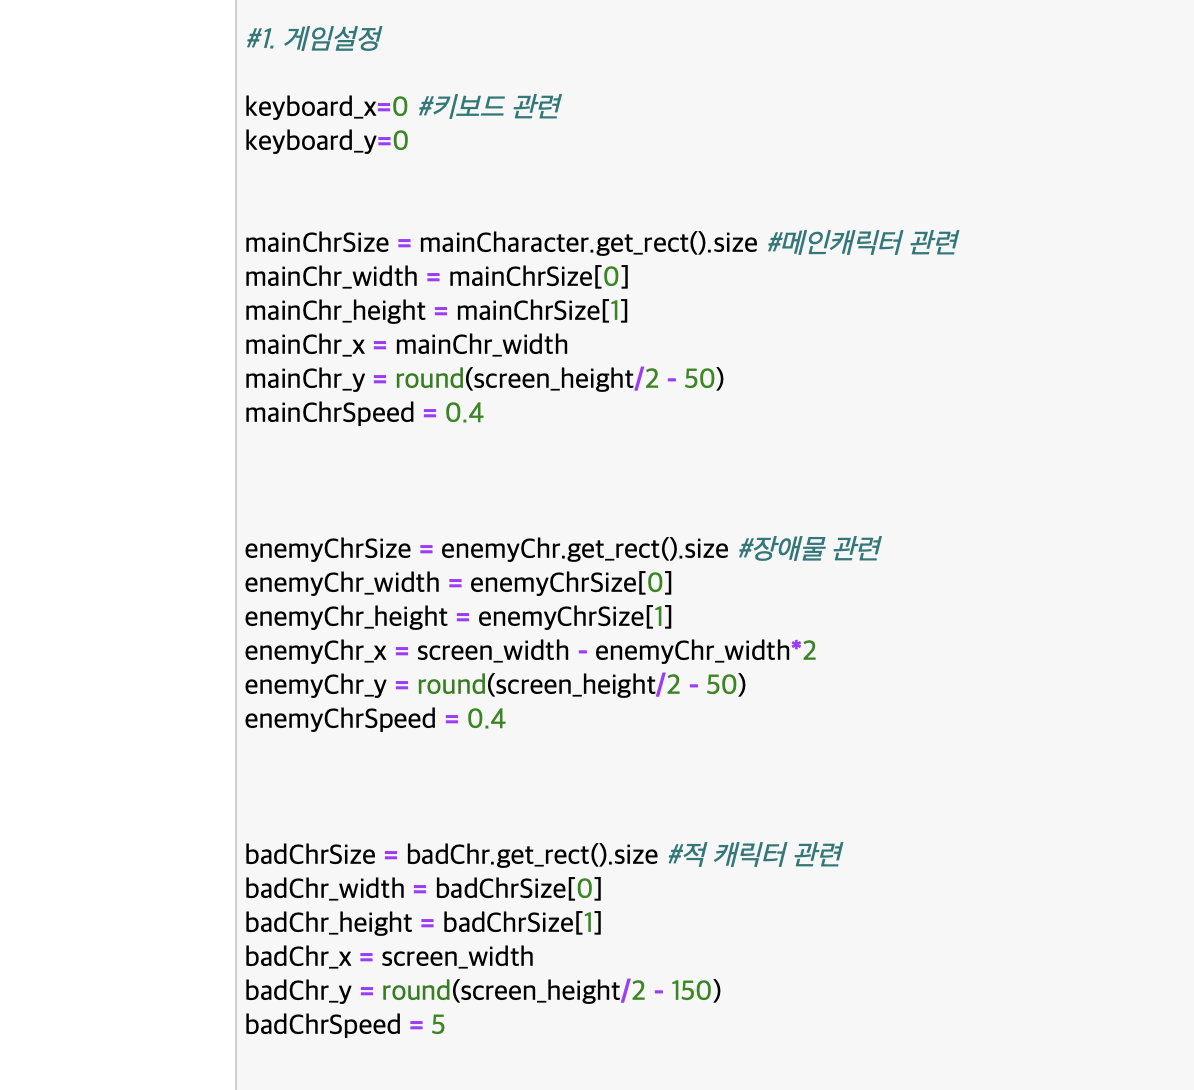

In [5]:
Image("./과정_스크린샷1.png")

2. 메뉴 과정 : 게임을 어떠한 방식으로 구동시킬시 고민하였는데, 처음에 메인,게임메뉴, 게임플레이 함수를 따로 만들어 특정 조건에서 서로서로 실행시키는 방식으로 만들어봤었다. 그러나 작동이 잘 되지 않아 지금의 방식을 이용하게 되었다. 함수를 부르는 방식이 마음에 들었어서, 나중에 시간이 된다면 이러한 방식으로도 구현해보고 싶다.

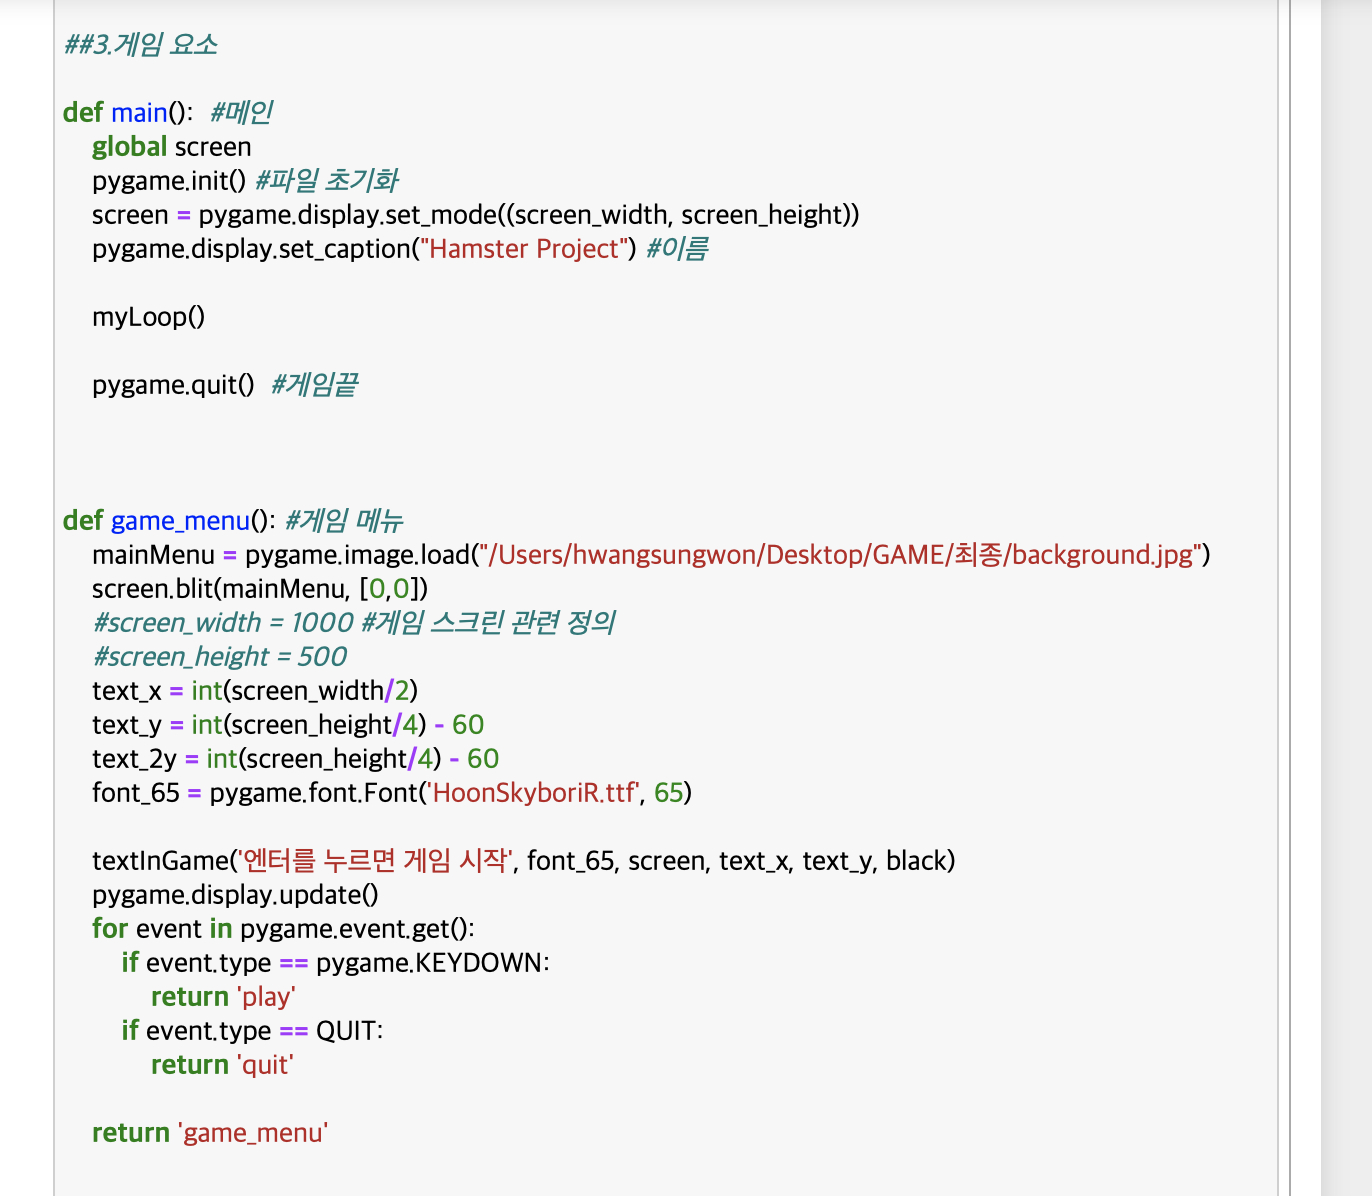

In [6]:
Image("./과정_스크린샷2.png")